## Programming for Data Science and Artificial Intelligence
### Workshop 0 - Customer Segmentation

### Introduction 

This work shop consists of the following tasks:

##### Overall goal: 
You are a data scienctist at Chaky's company and Chaky would like you to perform a customer analysis to identify different segments of customers. This can help business better understand current and potential customers, so they can increase sales and grow their business.

##### Section 01: Exploratory Data Analysis
* Are there any null values or outliers? How will you wrangle/handle them?
* Are there any variables that warrant transformations?
* Are there any useful variables that you can engineer with the given data?
* Do you notice any patterns or anomalies in the data? Can you plot them?

##### Section 02: Data Analysis
* Is it a regression/ classification problem?
* Is it a supervised/ unsupervised problem?
* Which model parameters should we take care of?

### Section 01: Exploratory Data Analysis

#### 01.01 Dataset
Before we begin the analysis, we will load and view the dataset, and perform some initial cleaning.

In [1]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# turn off warnings for final notebook
import warnings
warnings.filterwarnings('ignore')

# load dataset
df = pd.read_csv("../data/Mall_Customers.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Let's see whether missing values

In [2]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Lucky!!! There are no missing data!

#### 01.02 Data Visualization

Let's do a pair plot to have some intuition and idea about the Spending Score of the Customers Visiting the Mall.

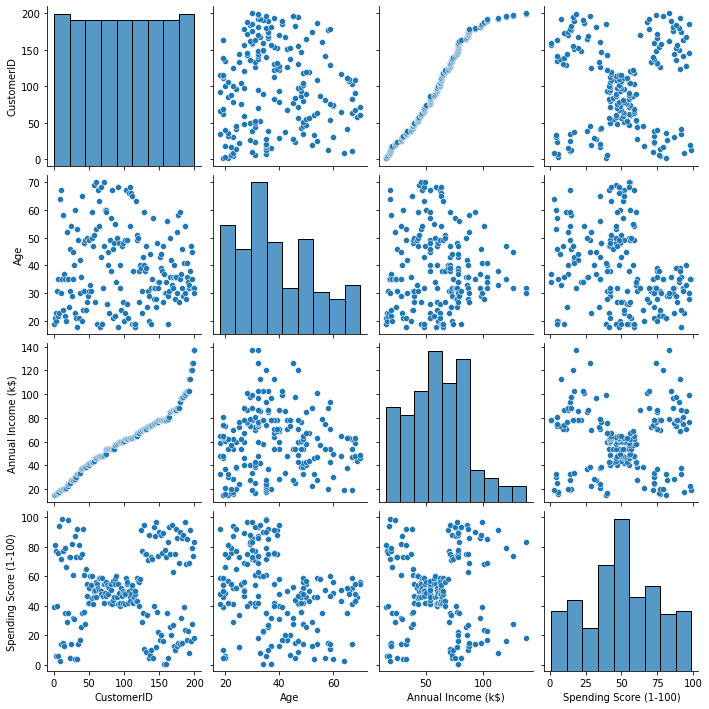

In [3]:
sns.pairplot(df)
plt.show()

Since there are 4 columns of different features, let's visualize the marginal distribution over each variable

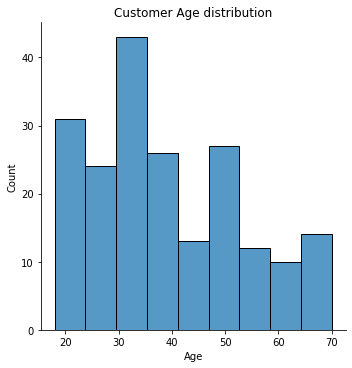

In [4]:
sns.displot(df.Age)
_ = plt.title('Customer Age distribution')

The most regular customers for the Mall has age around 30-35 years of age. Whereas the the senior citizens age group is the least frequent visitor in the Mall. Youngsters are lesser in umber as compared to the Middle aged people.

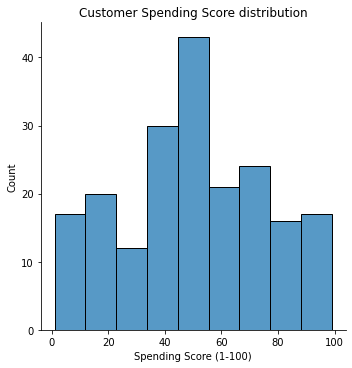

In [5]:
sns.displot(df['Spending Score (1-100)'])
_ = plt.title('Customer Spending Score distribution')

we can see that most people have a spedning score at around 50

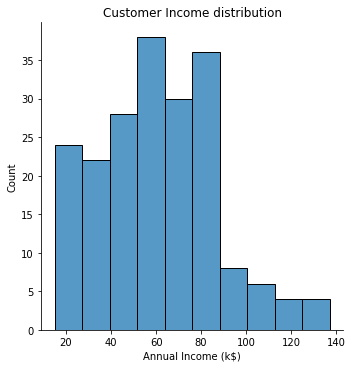

In [6]:
sns.displot(df['Annual Income (k$)'])
_ = plt.title('Customer Income distribution')

we can infer one thing that There are few people who earn more than 100 US Dollars. Most of the people have an earning of around 50-75 US Dollars. Also, we can say that the least Income is around 20 US Dollars.

What about age?
Let's use a pie chart

* Pie Chart

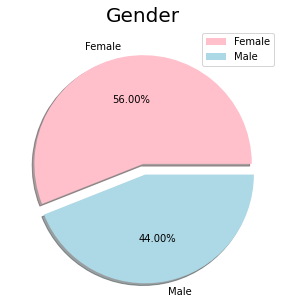

In [7]:
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['pink', 'lightblue']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

Or should we use a bar chart?

* Bar plot

Bar plot shows point estimates and confidence intervals as rectangular bars.

A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars. Bar plots include 0 in the quantitative axis range, and they are a good choice when 0 is a meaningful value for the quantitative variable, and you want to make comparisons against it.

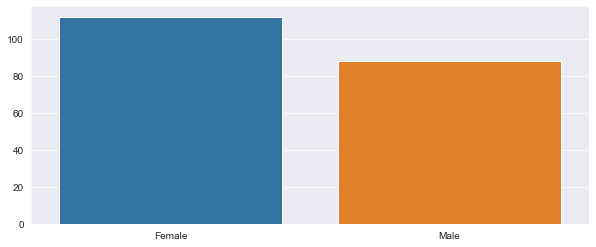

In [8]:
genders = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

Let's try out different plot types

* Violin Plot

Violin plot draws a combination of boxplot and kernel density estimate.

A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

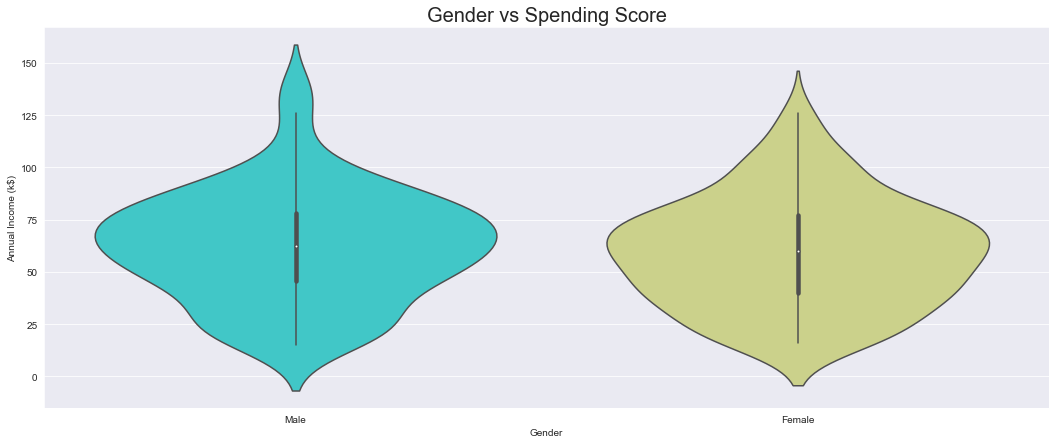

In [9]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(df['Gender'], df['Annual Income (k$)'], palette = 'rainbow')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

It is clearly visible that the most of the males have a Spending Score of around 25k US Dollars to 70k US Dollars whereas the Females have a spending score of around 35k US Dollars to 75k US Dollars. which points to the fact that women are Shopping Leaders

* Boxplot

Box plot shows distributions with respect to categories.

A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

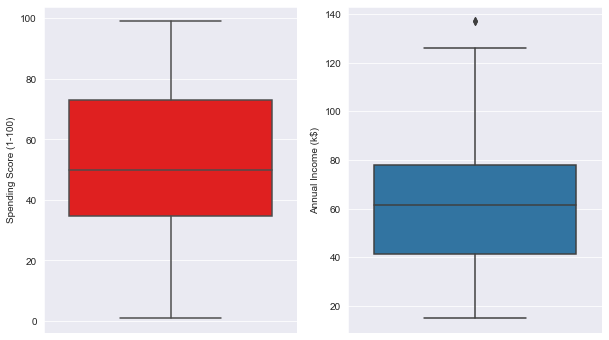

In [10]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["Spending Score (1-100)"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=df["Annual Income (k$)"])
plt.show()

Now, let's plot barplots on our own custom age range

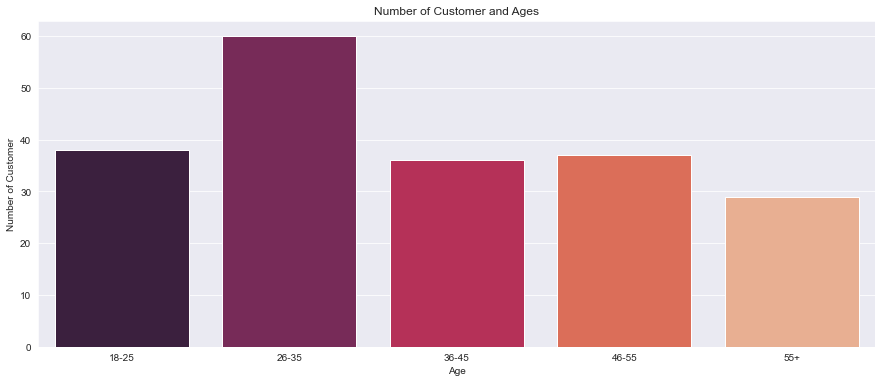

In [11]:
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

Now, let's plot barplots on our own spending score range 

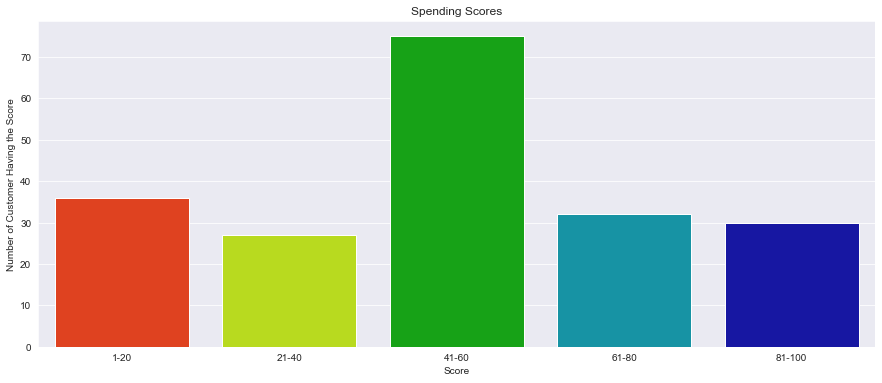

In [12]:
ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

Now, let's plot barplots on our own annual income (k$) range 

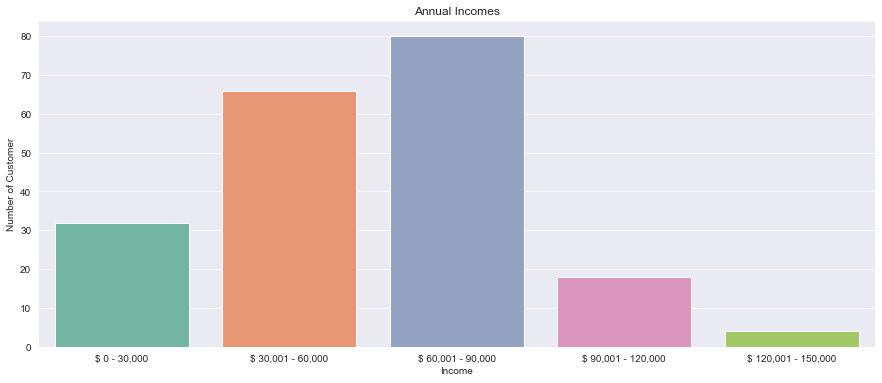

In [13]:
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

What about a 3D plot? Let's plot a 3D plot using
1. Annual Income (k$)
2. Spending Score (1-100)
3. Age

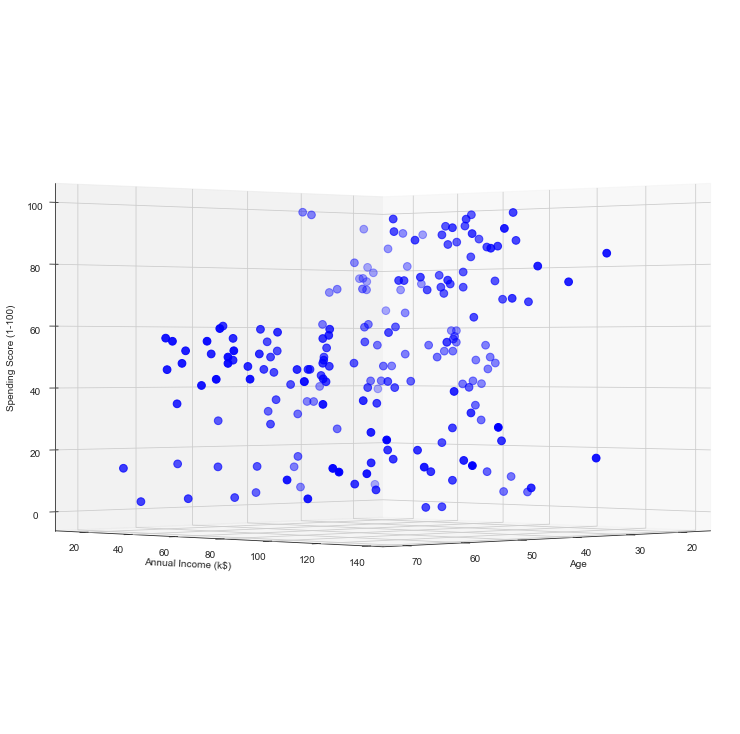

In [14]:
from mpl_toolkits.mplot3d import axes3d, Axes3D

sns.set_style("white")
fig = plt.figure(figsize=(10,10))

ax = Axes3D(fig)

ax.scatter(df.Age, df["Annual Income (k$)"], df["Spending Score (1-100)"], c="blue", s=60)
ax.view_init(0, 45)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

After plotting the data using several methods, it is not yet clear to identify different groups of customers by eye. Therefore, you decided to use the knowledge that you gained during the **super intensive** python Bootcamp to help you segment the customers.

### Section 02 Data Analysis

#### 02.01 Drop irrelevant columns

First, let's drop columns that are irrelevant for our analysis.

Drop CustomerID and Gender columns because in this case it is unnecessary.

In [15]:
# Drop "CustomerID" column 
df.drop(["CustomerID"], axis = 1, inplace=True)
df.head()

# Drop "Gender" column
df.drop(["Gender"], axis = 1, inplace=True)

In [16]:
df.head()

#all sklearn input of X must (m, n) and if possible, make it into numpy

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


Since you have no prior-knowledge of how your customers should be segmented/grouped and also that the data given by Chaky are not pre-labeled, you decided that this is an **unsupervised learning** problem. After consulting with the team, you decided to use **K-means clustering** to perform the analysis.

K-means clustering is a type of unsupervised learning which is used when you have **unlabeled** data. By using this algorithm you will try to find groups in the data. **"k" value represent number of groups/ clusters**

As you can see from the 3D plot that you have plotted above, the value of k is yet unclear (it is not so distinguishable)

Example of when an appropriate k value is unknown:

1. Right is when k = 2
2. Left is when k = 3

<center><img src="../figures/ws0-kmeans.png" width=400 height=400/></center>

Since we don't know the appropriate value of k (how many segments/clusters there are), it makes sense to perform Grid search on k

#### 02.02 Grid Search

Grid search is an exhaustive search over specified parameter values for an estimator, in our case it is k.

Perform **Grid Search** to find an appropriate **k value** (n_clusters)

In [17]:
# Let's prepare our inputs (Do we need "y"?)
#to use the masking, you have to change to numpy
X = df.to_numpy()  #or df.values
# y = 

# Let's check the shape of our input
assert X.shape == (200,3)

Let's check for the possible estimators for k-mean clustering

In [18]:
from sklearn.cluster import KMeans
KMeans().get_params().keys()

dict_keys(['algorithm', 'copy_x', 'init', 'max_iter', 'n_clusters', 'n_init', 'n_jobs', 'precompute_distances', 'random_state', 'tol', 'verbose'])

In [19]:
from sklearn.cluster import KMeans
KMeans().get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 8,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

Let's perform GridSearchCV

In [20]:
from sklearn.model_selection import GridSearchCV

# Define model
model = KMeans()

# Define param_grid
param_grid = {
            'n_clusters': [2, 3, 4, 5]
            }

# Define number of cross-validation
cv = 7

# GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv=cv)

# Fit
grid.fit(X)

# Check best params
grid.best_params_

{'n_clusters': 5}

By now, you should have found the **best params** for your model, lets use that to train our model.

#### 02.03 Training

Let's split data for training and testing

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size=0.33, shuffle=True)

print("Shape of X train", X_train.shape)
print("Shape of X test", X_test.shape)

Shape of X train (134, 3)
Shape of X test (66, 3)


Let's perform the clustering based on the best param we found

In [22]:
from sklearn.cluster import KMeans

# Define number of
k = 5

# Define model
model = KMeans(n_clusters=k)

# Fit model
model.fit(X_train)
yhat_train = model.labels_

# Predict model
yhat_test = model.predict(X_test)

#### 02.04 Plot results

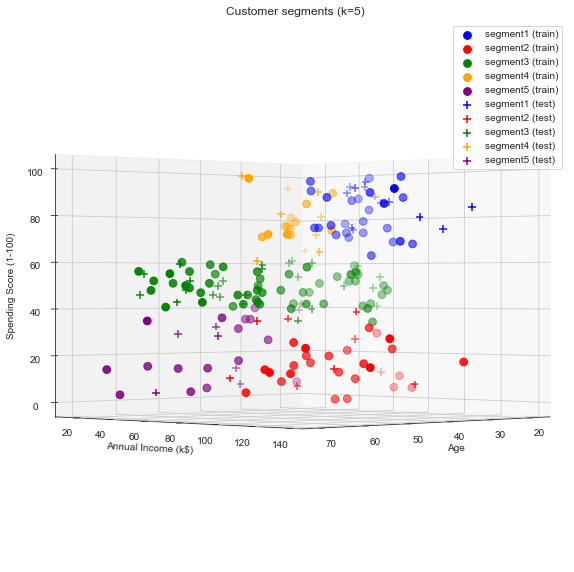

In [23]:
yhat_train = model.labels_
yhat_test = model.predict(X_test)

# Plot the data

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Plot train
ax.scatter(X_train[yhat_train == 0, 0], X_train[yhat_train == 0, 1], X_train[yhat_train == 0, 2], c='blue', s=60, label = "segment1 (train)")
ax.scatter(X_train[yhat_train == 1, 0], X_train[yhat_train == 1, 1], X_train[yhat_train == 1, 2], c='red', s=60, label = "segment2 (train)")
ax.scatter(X_train[yhat_train == 2, 0], X_train[yhat_train == 2, 1], X_train[yhat_train == 2, 2], c='green', s=60, label = "segment3 (train)")
ax.scatter(X_train[yhat_train == 3, 0], X_train[yhat_train == 3, 1], X_train[yhat_train == 3, 2], c='orange', s=60, label = "segment4 (train)")
ax.scatter(X_train[yhat_train == 4, 0], X_train[yhat_train == 4, 1], X_train[yhat_train == 4, 2], c='purple', s=60, label = "segment5 (train)")

# Plot test on top of train plot
ax.scatter(X_test[yhat_test == 0, 0], X_test[yhat_test == 0, 1], X_test[yhat_test == 0, 2], c='blue',marker = '+', s=60, label = "segment1 (test)")
ax.scatter(X_test[yhat_test == 1, 0], X_test[yhat_test == 1, 1], X_test[yhat_test == 1, 2], c='red',marker = '+', s=60, label = "segment2 (test)")
ax.scatter(X_test[yhat_test == 2, 0], X_test[yhat_test == 2, 1], X_test[yhat_test == 2, 2], c='green',marker = '+', s=60, label = "segment3 (test)")
ax.scatter(X_test[yhat_test == 3, 0], X_test[yhat_test == 3, 1], X_test[yhat_test == 3, 2], c='orange',marker = '+', s=60, label = "segment4 (test)")
ax.scatter(X_test[yhat_test == 4, 0], X_test[yhat_test == 4, 1], X_test[yhat_test == 4, 2], c='purple',marker = '+', s=60, label = "segment5 (test)")


ax.view_init(0, 45)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.title(f'Customer segments (k={k})')
plt.legend()
plt.show()